## Part 1

### Building Model1
Uses Pytorch to implement a three-layer Neural Network (input layer - hidden layer - output layer) and update the weights with backpropagation.
- 1. Implement forward and calculate the output
- 2. Calculate errors and loss  
- 3. Update the weights with backpropagation 
- 4. Predict function 
- 5. Activation function (Sigmoid function) 

### Evaluator Function (1 point)  
Implements the evaluator function with Pytorch or Numpy only   
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

### Training and Evaluating Model1 (1 point)  
Trains Model1 with customized hidden size, learning rate, number of iterations and batch size.
Uses the predict function to predict the labels with the test dataset.
Evaluates the prediction results.
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST

In [3]:
# you can go to Edit - Notebook settings to select GPU under the Hardware accelerator
# check the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
# build the dataset (train, validation and test)
def load_MNIST(n_val=10000, n_sample=1000, sample=False):
    n_val = n_val
    n_sample = n_sample
    train = MNIST(root = '.', train = True, download = True)
    test = MNIST(root = '.', train = False, download = True)
    
    # data preprocessing
    x_train, x_test = train.data/255, test.data/255
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    y_train = torch.nn.functional.one_hot(train.targets)
    y_test = torch.nn.functional.one_hot(test.targets)

    data_dict = {}
    if sample:
        data_dict['x_train'] = x_train[:-n_val][:n_sample]
        data_dict['y_train'] = y_train[:-n_val][:n_sample]
        data_dict['x_val'] = x_train[-n_val:][:n_sample//10]
        data_dict['y_val'] = y_train[-n_val:][:n_sample//10]
        data_dict['x_test'] = x_test[:n_sample//10]
        data_dict['y_test'] = y_test[:n_sample//10]
    else:
        data_dict['x_train'] = x_train[:-n_val]
        data_dict['y_train'] = y_train[:-n_val]
        data_dict['x_val'] = x_train[-n_val:]
        data_dict['y_val'] = y_train[-n_val:]
        data_dict['x_test'] = x_test
        data_dict['y_test'] = y_test
    return data_dict

In [8]:
# you can start with a small sample dataset by setting sample=True
data_dict = load_MNIST(sample=False)
print('Train data shape:', data_dict['x_train'].shape)
print('Train labels shape:', data_dict['y_train'].shape)
print('Validation data shape:', data_dict['x_val'].shape)
print('Validation labels shape:', data_dict['y_val'].shape)
print('Test data shape:', data_dict['x_test'].shape)
print('Test labels shape:', data_dict['y_test'].shape)

Train data shape: torch.Size([50000, 784])
Train labels shape: torch.Size([50000, 10])
Validation data shape: torch.Size([10000, 784])
Validation labels shape: torch.Size([10000, 10])
Test data shape: torch.Size([10000, 784])
Test labels shape: torch.Size([10000, 10])


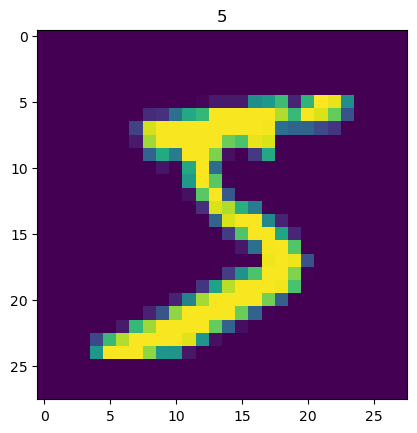

In [9]:
# plot an example
plt.imshow(data_dict['x_train'][0].reshape(28, 28))
plt.title(data_dict['y_train'][0].argmax().item())
plt.show()

In [144]:
def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation metrics including confusion matrix, accuracy, precision and recall
    # you can only use Numpy or Pytorch to implement the metrics
    TN = FN = FP = TP = 0

    for test, pred in zip(y_test, y_pred):
        if test == 1: 
            if pred == 1: 
                TP += 1
            else:
                FP += 1
        else:
            if pred == 1:
                FN += 1
            else:
                TN += 1

    accuracy = ( TP + TN ) / ( TP + FP + FN + TN )
    precision = TP / ( TP + FP )
    recall = TP / ( TP + FN )
    f1 = 2 * precision * recall / ( precision + recall )

    confusion_matrix = [[TN, FP], [FN, TP]]
    evaluation_matrix = {'confusion_matrix': confusion_matrix,
                         'accuracy': accuracy,
                         'precision': precision,
                         'recall': recall,
                         'f1': f1}

    return evaluation_matrix
####################################################################################################

In [72]:
class NN(object):
    def __init__(self, learning_rate, n_iters, batch_size, hidden_size, device, dtype=torch.float32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.device = device
        self.dtype = dtype
        self.history = {}
        self.history['train_acc'], self.history['val_acc'], self.history['loss'] = [], [], []
    
    # 5. activation function
    def sigmoid(self, x):
        ####################################################################################################
        # enter code here to implement the activation function
        return 1 / ( 1 + torch.exp( -x ) )
        
        ####################################################################################################

    def train(self, x, y, x_val, y_val, verbose=1):
        n_train = x.shape[0]
        n_val = x_val.shape[0]
        input_size = x.shape[1]
        num_classes = y.shape[1]
        
        # weight initialization
        self.W1 = torch.randn(input_size, self.hidden_size, dtype=self.dtype, device=self.device) * 0.01
        self.W2 = torch.randn(self.hidden_size, num_classes, dtype=self.dtype, device=self.device) * 0.01

        # TODO: train the weights with the input data and labels
        for i in range(self.n_iters):
            loss = 0
            data = getBatch(x, y, self.batch_size)
            for x_batch, y_batch in data:
                # 1. forward
                ####################################################################################################
                # enter code here to calculate the hidden layer output and output layer output
                hidden = self.sigmoid( torch.matmul(x_batch,self.W1) )
                output = self.sigmoid( torch.matmul(hidden,self.W2) )

                ####################################################################################################

                # 2. error and loss
                ####################################################################################################
                # enter code here to calculate the output error, MSE loss, delta output and delta hidden
                output_error = y_batch - output
                output_delta = torch.mul( output_error, np.multiply( output, (1 - output ) ) )

                hidden_error = torch.matmul( output_delta, np.transpose( self.W2 ) )
                hidden_delta = torch.multiply( hidden_error, np.multiply( hidden, (1 - hidden ) ) )

                loss += torch.sum( torch.pow( output_error, 2 ) ) / self.batch_size

                ####################################################################################################

                # 3. backward
                ####################################################################################################
                # enter code here to calculate delta weights and update the weights
                self.W1 += torch.matmul( torch.t( x_batch ), hidden_delta )
                self.W2 += torch.matmul( torch.t( hidden ), output_delta )
                
                ####################################################################################################

            # calculate the accuracy and save the training history
            y_pred = self.predict(x)
            train_acc = torch.sum(torch.argmax(y, dim=1) == y_pred) / n_train
            self.history['train_acc'].append(train_acc)
            self.history['loss'].append(loss)
            
            y_pred = self.predict(x_val)
            val_acc = torch.sum(torch.argmax(y_val, dim=1) == y_pred) / n_val
            self.history['val_acc'].append(val_acc)
            if verbose:
                print('epoch %d, loss %.4f, train acc %.3f, validation acc %.3f'
                  % (i + 1, loss, train_acc, val_acc))
    
    # 4. predict function 
    def predict(self, x):
        ####################################################################################################
        # enter code here to implement the predict function
        # TODO: use the trained weights to predict labels and return the predicted labels
        # remember to use torch.argmax() to return the true labels
        hidden = self.sigmoid( torch.matmul( x, self.W1 ) )
        output = self.sigmoid( torch.matmul( hidden, self.W2 ) )
        y_pred = torch.argmax( output, dim = 1 )
        
        ####################################################################################################
        return y_pred

def getBatch(x, y, batch_size):
    n_epoch = x.shape[0] // batch_size
    for i in range(n_epoch):
        x_batch = x[i * batch_size : (i+1) * batch_size]
        y_batch = y[i * batch_size : (i+1) * batch_size]
        yield x_batch, y_batch
    x_batch = x[(i+1) * batch_size:]
    y_batch = y[(i+1) * batch_size:]    
    yield x_batch, y_batch

In [76]:
####################################################################################################
# enter code here to train Model1
# TODO: set your desired hidden size, learning rate, number of iterations and batch size
# remeber to load the dataset to the device (e.g. data_dict['x_train'].to(device))
model = NN( learning_rate = 0.01,
            n_iters = 1000,
            batch_size = 5,
            hidden_size = 50,
            device = device )

model.train( data_dict['x_train'].to(device), data_dict['y_train'].to(device), data_dict['x_val'].to(device), data_dict['y_val'].to(device))

####################################################################################################

epoch 1, loss 1632.2755, train acc 0.931, validation acc 0.938
epoch 2, loss 1022.3666, train acc 0.941, validation acc 0.943
epoch 3, loss 903.2875, train acc 0.945, validation acc 0.948
epoch 4, loss 848.7372, train acc 0.955, validation acc 0.951
epoch 5, loss 780.8338, train acc 0.957, validation acc 0.953
epoch 6, loss 761.2649, train acc 0.954, validation acc 0.954
epoch 7, loss 711.7524, train acc 0.962, validation acc 0.959
epoch 8, loss 689.6310, train acc 0.961, validation acc 0.956
epoch 9, loss 654.4161, train acc 0.960, validation acc 0.957
epoch 10, loss 618.1964, train acc 0.966, validation acc 0.961
epoch 11, loss 605.7079, train acc 0.969, validation acc 0.961
epoch 12, loss 600.7737, train acc 0.968, validation acc 0.958
epoch 13, loss 576.5968, train acc 0.963, validation acc 0.955
epoch 14, loss 570.7835, train acc 0.967, validation acc 0.957
epoch 15, loss 575.6801, train acc 0.968, validation acc 0.959
epoch 16, loss 544.3409, train acc 0.972, validation acc 0.962

epoch 131, loss 159.9517, train acc 0.991, validation acc 0.965
epoch 132, loss 164.9811, train acc 0.990, validation acc 0.966
epoch 133, loss 177.6415, train acc 0.990, validation acc 0.965
epoch 134, loss 193.5452, train acc 0.990, validation acc 0.966
epoch 135, loss 181.7969, train acc 0.990, validation acc 0.965
epoch 136, loss 166.3330, train acc 0.988, validation acc 0.964
epoch 137, loss 196.0388, train acc 0.990, validation acc 0.965
epoch 138, loss 173.8213, train acc 0.991, validation acc 0.966
epoch 139, loss 174.3884, train acc 0.990, validation acc 0.966
epoch 140, loss 173.4934, train acc 0.990, validation acc 0.966
epoch 141, loss 155.8953, train acc 0.990, validation acc 0.964
epoch 142, loss 163.6310, train acc 0.990, validation acc 0.965
epoch 143, loss 163.2957, train acc 0.989, validation acc 0.965
epoch 144, loss 158.5776, train acc 0.990, validation acc 0.965
epoch 145, loss 161.9202, train acc 0.991, validation acc 0.965
epoch 146, loss 151.4014, train acc 0.99

epoch 260, loss 117.1535, train acc 0.992, validation acc 0.966
epoch 261, loss 115.3184, train acc 0.992, validation acc 0.967
epoch 262, loss 124.7718, train acc 0.992, validation acc 0.966
epoch 263, loss 121.4891, train acc 0.992, validation acc 0.966
epoch 264, loss 139.1436, train acc 0.992, validation acc 0.966
epoch 265, loss 122.9712, train acc 0.992, validation acc 0.966
epoch 266, loss 117.7332, train acc 0.992, validation acc 0.965
epoch 267, loss 132.9304, train acc 0.992, validation acc 0.967
epoch 268, loss 138.8305, train acc 0.991, validation acc 0.964
epoch 269, loss 144.3230, train acc 0.984, validation acc 0.961
epoch 270, loss 180.7309, train acc 0.990, validation acc 0.965
epoch 271, loss 146.6377, train acc 0.991, validation acc 0.966
epoch 272, loss 135.9958, train acc 0.992, validation acc 0.966
epoch 273, loss 147.4546, train acc 0.988, validation acc 0.961
epoch 274, loss 188.6075, train acc 0.991, validation acc 0.964
epoch 275, loss 145.5193, train acc 0.99

epoch 389, loss 149.2845, train acc 0.992, validation acc 0.964
epoch 390, loss 160.3880, train acc 0.990, validation acc 0.963
epoch 391, loss 151.6448, train acc 0.992, validation acc 0.965
epoch 392, loss 141.8022, train acc 0.992, validation acc 0.965
epoch 393, loss 146.1917, train acc 0.991, validation acc 0.965
epoch 394, loss 145.1112, train acc 0.992, validation acc 0.966
epoch 395, loss 126.5958, train acc 0.992, validation acc 0.966
epoch 396, loss 124.2608, train acc 0.992, validation acc 0.965
epoch 397, loss 144.1464, train acc 0.991, validation acc 0.965
epoch 398, loss 152.1475, train acc 0.990, validation acc 0.964
epoch 399, loss 122.7892, train acc 0.993, validation acc 0.966
epoch 400, loss 136.0976, train acc 0.992, validation acc 0.965
epoch 401, loss 135.9737, train acc 0.991, validation acc 0.964
epoch 402, loss 137.7159, train acc 0.992, validation acc 0.964
epoch 403, loss 117.6926, train acc 0.993, validation acc 0.963
epoch 404, loss 120.9991, train acc 0.99

epoch 518, loss 123.9992, train acc 0.993, validation acc 0.966
epoch 519, loss 114.5307, train acc 0.992, validation acc 0.964
epoch 520, loss 120.6107, train acc 0.993, validation acc 0.965
epoch 521, loss 141.8484, train acc 0.992, validation acc 0.964
epoch 522, loss 132.5234, train acc 0.993, validation acc 0.964
epoch 523, loss 116.4083, train acc 0.993, validation acc 0.965
epoch 524, loss 112.9154, train acc 0.992, validation acc 0.964
epoch 525, loss 136.7068, train acc 0.991, validation acc 0.965
epoch 526, loss 145.3332, train acc 0.991, validation acc 0.965
epoch 527, loss 142.5294, train acc 0.991, validation acc 0.963
epoch 528, loss 157.4758, train acc 0.991, validation acc 0.964
epoch 529, loss 162.3171, train acc 0.991, validation acc 0.966
epoch 530, loss 151.6309, train acc 0.993, validation acc 0.966
epoch 531, loss 132.8366, train acc 0.992, validation acc 0.967
epoch 532, loss 151.8259, train acc 0.992, validation acc 0.965
epoch 533, loss 156.9321, train acc 0.99

epoch 647, loss 94.3139, train acc 0.993, validation acc 0.965
epoch 648, loss 94.1521, train acc 0.993, validation acc 0.965
epoch 649, loss 93.9302, train acc 0.993, validation acc 0.965
epoch 650, loss 93.8337, train acc 0.993, validation acc 0.965
epoch 651, loss 93.7445, train acc 0.993, validation acc 0.965
epoch 652, loss 93.7544, train acc 0.993, validation acc 0.965
epoch 653, loss 93.6091, train acc 0.993, validation acc 0.965
epoch 654, loss 93.5591, train acc 0.993, validation acc 0.965
epoch 655, loss 93.4541, train acc 0.993, validation acc 0.965
epoch 656, loss 93.4438, train acc 0.993, validation acc 0.965
epoch 657, loss 93.3434, train acc 0.993, validation acc 0.965
epoch 658, loss 93.2962, train acc 0.993, validation acc 0.965
epoch 659, loss 93.2652, train acc 0.993, validation acc 0.965
epoch 660, loss 93.2538, train acc 0.993, validation acc 0.965
epoch 661, loss 93.1968, train acc 0.993, validation acc 0.965
epoch 662, loss 93.0321, train acc 0.993, validation ac

epoch 777, loss 111.0927, train acc 0.993, validation acc 0.965
epoch 778, loss 98.4904, train acc 0.993, validation acc 0.965
epoch 779, loss 97.5856, train acc 0.993, validation acc 0.965
epoch 780, loss 112.0925, train acc 0.993, validation acc 0.965
epoch 781, loss 108.0154, train acc 0.993, validation acc 0.964
epoch 782, loss 108.4413, train acc 0.993, validation acc 0.965
epoch 783, loss 116.4204, train acc 0.993, validation acc 0.965
epoch 784, loss 106.2443, train acc 0.993, validation acc 0.966
epoch 785, loss 113.9086, train acc 0.993, validation acc 0.965
epoch 786, loss 102.5663, train acc 0.993, validation acc 0.966
epoch 787, loss 101.2990, train acc 0.993, validation acc 0.965
epoch 788, loss 97.5069, train acc 0.993, validation acc 0.965
epoch 789, loss 113.5907, train acc 0.993, validation acc 0.965
epoch 790, loss 99.5340, train acc 0.993, validation acc 0.965
epoch 791, loss 103.1027, train acc 0.993, validation acc 0.966
epoch 792, loss 94.3596, train acc 0.993, va

epoch 907, loss 137.7109, train acc 0.991, validation acc 0.965
epoch 908, loss 146.6967, train acc 0.993, validation acc 0.965
epoch 909, loss 159.0026, train acc 0.991, validation acc 0.964
epoch 910, loss 135.5379, train acc 0.991, validation acc 0.963
epoch 911, loss 174.9820, train acc 0.991, validation acc 0.965
epoch 912, loss 135.6326, train acc 0.992, validation acc 0.966
epoch 913, loss 140.6139, train acc 0.993, validation acc 0.965
epoch 914, loss 153.8327, train acc 0.992, validation acc 0.964
epoch 915, loss 163.2350, train acc 0.992, validation acc 0.964
epoch 916, loss 151.0223, train acc 0.992, validation acc 0.965
epoch 917, loss 126.6869, train acc 0.993, validation acc 0.966
epoch 918, loss 127.0080, train acc 0.992, validation acc 0.965
epoch 919, loss 133.9351, train acc 0.993, validation acc 0.964
epoch 920, loss 120.2339, train acc 0.992, validation acc 0.965
epoch 921, loss 124.2144, train acc 0.992, validation acc 0.966
epoch 922, loss 112.4319, train acc 0.99

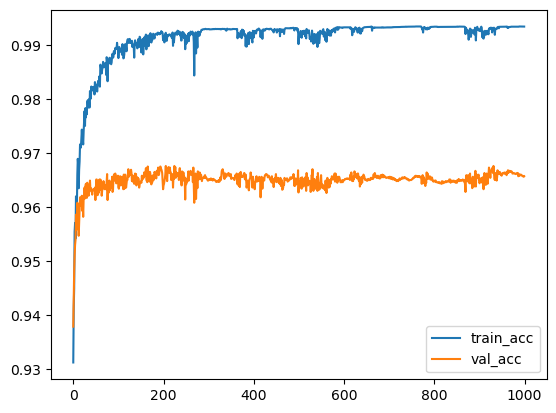

In [77]:
plt.plot(model.history['train_acc'], label='train_acc')
plt.plot(model.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [143]:
####################################################################################################
# enter code here to evaluate Model1 with test set
# TODO: use the trained Model1 to predict the labels of test set and evaluate the results with the evaluator
prediction = model.predict( data_dict['x_test'].to( device ) )
evaluation_matrix = evaluator( data_dict['y_test'].to( device ).argmax( axis = 1), prediction )
print( evaluation_matrix )
                              
####################################################################################################

{'confusion_matrix': [[8840, 16], [25, 1119]], 'accuracy': 0.9959, 'precision': 0.9859030837004406, 'recall': 0.9781468531468531, 'f1': 0.9820096533567354}


## Part 2
Using another machine learning framework (**scikit-learn, Tensorflow and Pytorch**) to build MLP
e.g. 
  1. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
  2. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
  3. https://pytorch.org/tutorials/beginner/examples_nn/polynomial_nn.html#sphx-glr-beginner-examples-nn-polynomial-nn-py
  
### Building Model2-1
Implements Model2-1 with the same hidden nodes and optimization function as the model in Part 1.
Train and validate model. Use the best model on validation dataset to test on the test dataset.

### Training and Evaluating Model2-1
Evaluates the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score.

### Building Model2-2
Adds one more hidden layer (2 hidden layers in total) to the model.
Describes Model2-2 (number of hidden nodes)  
Trains and validate model. Uses the best model on validation dataset to test on the test dataset.

### Training and Evaluating Model2-2
Evaluates the prediction results  
- Evaluation metrics include confusion matrix, accuracy, recall score, precision and F1 score.

In [156]:
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Model2-1

In [153]:
####################################################################################################
# enter code here to implement Model2-1
model1 = MLPClassifier( learning_rate_init = 0.01, 
                        max_iter = 1000,
                        batch_size = 5,
                        hidden_layer_sizes = (50,) )

####################################################################################################

In [154]:
####################################################################################################
# enter code here to train Model2-1
model1.fit( data_dict['x_train'].detach().cpu(), data_dict['y_train'].detach().cpu() )

####################################################################################################

MLPClassifier(batch_size=5, hidden_layer_sizes=(50,), learning_rate_init=0.01,
              max_iter=1000)

In [161]:
####################################################################################################
# enter code here to evaluate Model2-1
prediction1 = model1.predict(data_dict['x_test'].detach().cpu())

confusion_matrix1 = confusion_matrix(data_dict['y_test'].detach().cpu().argmax(axis=1), prediction1.argmax(axis=1), normalize='all')
accuracy1 = accuracy_score( data_dict['y_test'].detach().cpu(), prediction1)
precision1 = precision_score( data_dict['y_test'].detach().cpu(), prediction1, average = 'micro' )
recall1 = recall_score( data_dict['y_test'].detach().cpu(), prediction1, average = 'micro' )
f11 = f1_score( data_dict['y_test'].detach().cpu(), prediction1, average = 'micro' )

evaluation_matrix1 = {'confusion_matrix': confusion_matrix1,
                     'accuracy': accuracy1,
                     'precision': precision1,
                     'recall': recall1,
                     'f1': f11}

print(evaluation_matrix1)

####################################################################################################

{'confusion_matrix': array([[9.610e-02, 1.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-04,
        1.200e-03, 2.000e-04, 3.000e-04, 0.000e+00],
       [2.300e-03, 1.102e-01, 2.000e-04, 1.000e-04, 0.000e+00, 0.000e+00,
        2.000e-04, 0.000e+00, 5.000e-04, 0.000e+00],
       [5.300e-03, 2.000e-04, 9.440e-02, 1.300e-03, 5.000e-04, 0.000e+00,
        5.000e-04, 2.000e-04, 8.000e-04, 0.000e+00],
       [4.900e-03, 0.000e+00, 6.000e-04, 9.400e-02, 0.000e+00, 1.000e-04,
        0.000e+00, 2.000e-04, 9.000e-04, 3.000e-04],
       [6.600e-03, 0.000e+00, 0.000e+00, 1.000e-04, 8.530e-02, 0.000e+00,
        1.500e-03, 0.000e+00, 5.000e-04, 4.200e-03],
       [1.280e-02, 0.000e+00, 0.000e+00, 4.200e-03, 0.000e+00, 6.600e-02,
        1.900e-03, 3.000e-04, 3.800e-03, 2.000e-04],
       [3.100e-03, 3.000e-04, 0.000e+00, 1.000e-04, 3.800e-03, 1.000e-04,
        8.810e-02, 1.000e-04, 2.000e-04, 0.000e+00],
       [9.800e-03, 2.000e-04, 1.800e-03, 2.000e-04, 5.000e-04, 0.000e+00,
        0.000e+0

### Model2-2

In [147]:
####################################################################################################
# enter code here to implement Model2-2
model2 = MLPClassifier( learning_rate_init = 0.01, 
                        max_iter = 1000,
                        batch_size = 5,
                        hidden_layer_sizes = (50,50) )

####################################################################################################

In [148]:
####################################################################################################
# enter code here to train Model2-2
model2.fit( data_dict['x_train'].detach().cpu(), data_dict['y_train'].detach().cpu() )


####################################################################################################

MLPClassifier(batch_size=5, hidden_layer_sizes=(50, 50),
              learning_rate_init=0.01, max_iter=1000)

In [160]:
####################################################################################################
# enter code here to evaluate Model2-2
prediction2 = model2.predict(data_dict['x_test'].detach().cpu())

confusion_matrix2 = confusion_matrix(data_dict['y_test'].detach().cpu().argmax(axis=1), prediction2.argmax(axis=1), normalize='all')
accuracy2 = accuracy_score( data_dict['y_test'].detach().cpu(), prediction2)
precision2 = precision_score( data_dict['y_test'].detach().cpu(), prediction2, average = 'micro' )
recall2 = recall_score( data_dict['y_test'].detach().cpu(), prediction2, average = 'micro' )
f12 = f1_score( data_dict['y_test'].detach().cpu(), prediction2, average = 'micro' )

evaluation_matrix2 = {'confusion_matrix': confusion_matrix2,
                     'accuracy': accuracy2,
                     'precision': precision2,
                     'recall': recall2,
                     'f1': f12}

print(evaluation_matrix2)
####################################################################################################

{'confusion_matrix': array([[9.670e-02, 1.000e-04, 2.000e-04, 0.000e+00, 0.000e+00, 3.000e-04,
        2.000e-04, 0.000e+00, 5.000e-04, 0.000e+00],
       [9.000e-04, 1.113e-01, 1.000e-04, 7.000e-04, 0.000e+00, 1.000e-04,
        0.000e+00, 0.000e+00, 4.000e-04, 0.000e+00],
       [6.800e-03, 1.000e-04, 9.190e-02, 1.800e-03, 0.000e+00, 2.000e-04,
        3.000e-04, 2.000e-04, 1.800e-03, 1.000e-04],
       [3.400e-03, 0.000e+00, 8.000e-04, 9.370e-02, 0.000e+00, 1.100e-03,
        0.000e+00, 2.000e-04, 1.300e-03, 5.000e-04],
       [8.200e-03, 6.000e-04, 1.800e-03, 0.000e+00, 8.190e-02, 0.000e+00,
        7.000e-04, 1.000e-04, 7.000e-04, 4.200e-03],
       [5.600e-03, 1.000e-04, 1.000e-04, 2.700e-03, 0.000e+00, 7.900e-02,
        4.000e-04, 2.000e-04, 7.000e-04, 4.000e-04],
       [6.800e-03, 3.000e-04, 4.000e-04, 0.000e+00, 2.000e-04, 1.600e-03,
        8.580e-02, 0.000e+00, 7.000e-04, 0.000e+00],
       [7.100e-03, 1.000e-03, 1.900e-03, 0.000e+00, 3.000e-04, 1.000e-04,
        0.000e+0